# Table of contents

### 1. Data gathering 
### 2. Data Assessing
### 3. Data Cleaning
### 4. Storing dataframe
### 5. Data visualization

# Gathering Data

In [150]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd
import requests
import numpy as np
from functools import reduce
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Declaring Twitter API keys and access tokens
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True )

In [3]:
list_of_tweets = []

In [4]:
# Importing the Twitter archive CSV file into a DataFrame
df = pd.read_csv('C:\\Users\\sodiq\\Downloads\\twitter-archive-enhanced.csv')

In [5]:
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [10]:
# Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Importing the tweet image predictions TSV file into a DataFrame
img_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [7]:
count = 0
fails_dict = {}
start = timer()

In [15]:
# Using the tweet IDs in the Twitter archive, query the Twitter API for each tweet's JSON

with open('tweet_json.txt', 'w') as outfile:
     for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except:
            print("Fail")
            fails_dict[tweet_id] = 'error'
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 177


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Rate limit reached. Sleeping for: 21


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

In [9]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
status_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

# Assessing Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [91]:
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [90]:
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

# Quality issues from the above dataset are:
1. Data columns like in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id have a lot of missing data and as a result of this they will be dropped. They are also not relevant for this analysis.
2. The data in source column needs to be clean
3. There are outliers in the  rating_numerator which has the minimum and maximum 1 and 1776 respectively.
4. In the rating_denominator column, 10 should be expected to be seen but we have outliers like 0 and 170.
5. The  column 'name' has some strange object like a,an,such,etc.
6. The data type for timestamp sould be in datetime not in string format and tweed_id should be in string.
7. Renaming some columns like so as to be more descriptive
8. Some variables that are not wanted in the analysis will be dropped.

# Tidiness
1. doggo, floffer, pupper and pupo should be grouped in a column called 'stage'
2. The three dataset need to be merged

In [10]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2327 non-null   int64 
 1   retweet_count       2327 non-null   int64 
 2   favorite_count      2327 non-null   int64 
 3   display_text_range  2327 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


# Quality issues
7. display_text_range isn't in a good format and also will be dropped since is not needed for the analysis.

In [69]:
status_df['retweet_count'].isnull().sum()

0

In [70]:
status_df['favorite_count'].isnull().sum()

0

In [11]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Quality issues
8. The jpg_url and img_num are not needed for the analysis and hence, they will be dropped.

# Tidiness
2. The p1,p2, and p3 need to be merged to form a column

In [44]:
img_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [50]:
img_df['p1'].isnull().sum()

0

In [51]:
img_df['p2'].isnull().sum()

0

In [52]:
img_df['p3'].isnull().sum()

0

In [54]:
img_df['p1_dog'].isnull().sum()

0

In [63]:
img_df['p1'].nunique()

378

In [67]:
img_df['p2'].unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [66]:
img_df['p3'].unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

# Cleaning data

In [43]:
df_clean = df.copy()
img_clean = img_df.copy()
status_clean= status_df.copy()

### Define
 merging df_clean, status_clean and img_df table on tweet_id column.

### Code

In [72]:
# Merge the df_clean, status_clean and img_df dataframes on 'tweet_id'
#Lastly, we need to merge 3 tables into one. 
dfs = [df_clean, status_clean, img_clean]
twitter = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

In [73]:
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Test

In [74]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  doggo                       2057 

### Define
 Removing unwanted rows (retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp)
 
### Code

In [75]:
twitter = twitter[twitter.retweeted_status_id.isnull()]
twitter = twitter[twitter.retweeted_status_user_id.isnull()]
twitter = twitter[df_clean.retweeted_status_timestamp.isnull()]

C:\Users\sodiq\AppData\Local\Temp/ipykernel_6768/1773558789.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  twitter = twitter[df_clean.retweeted_status_timestamp.isnull()]


### Test

In [76]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1822 entries, 0 to 2056
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1822 non-null   int64  
 1   in_reply_to_status_id       22 non-null     float64
 2   in_reply_to_user_id         22 non-null     float64
 3   timestamp                   1822 non-null   object 
 4   source                      1822 non-null   object 
 5   text                        1822 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1822 non-null   object 
 10  rating_numerator            1822 non-null   int64  
 11  rating_denominator          1822 non-null   int64  
 12  name                        1822 non-null   object 
 13  doggo                       1822 

In [77]:
# Removing the columns that are empty
twitter.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace =True)


In [78]:
#cconfirming the columns have been drooped
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1822 entries, 0 to 2056
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1822 non-null   int64  
 1   in_reply_to_status_id  22 non-null     float64
 2   in_reply_to_user_id    22 non-null     float64
 3   timestamp              1822 non-null   object 
 4   source                 1822 non-null   object 
 5   text                   1822 non-null   object 
 6   expanded_urls          1822 non-null   object 
 7   rating_numerator       1822 non-null   int64  
 8   rating_denominator     1822 non-null   int64  
 9   name                   1822 non-null   object 
 10  doggo                  1822 non-null   object 
 11  floofer                1822 non-null   object 
 12  pupper                 1822 non-null   object 
 13  puppo                  1822 non-null   object 
 14  retweet_count          1822 non-null   int64  
 15  favo

## Tidiness
doggo, floofer, pupper, and puppo column in Twitter_Archive table are all describing dog age stage.

### Define
The doggo, floofer, pupper, and puppo column should be merged into one column called dog_stage to reduce redundency.

### Code

In [80]:
twitter['dog_stage'] = twitter['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [81]:
# Check that first few instances of dog_stage are similar 
# to that which was previously extracted
twitter[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(15)

,dog_stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [82]:
# Drop doggo, floofer, pupper, and puppo columns
twitter = twitter.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test

In [83]:
twitter['dog_stage'].value_counts()

pupper     210
doggo       56
puppo       17
floofer      3
Name: dog_stage, dtype: int64

There are 4 different kinds of source -- 'Twitter for iPhone','Vine - Make a Scene','Twitter Web Client',and 'TweetDeck'.

### Define
Source column should be converted into 4 category of source -'Twitter for iPhone','Vine - Make a Scene','Twitter Web Client',and 'TweetDeck'.

In [85]:
# Mapping from full source to short source name =
sourcemap = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone',
'<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' : 'Vine - Make a Scene',
'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' :'Twitter Web Client',
'<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'}

# Function to apply
def convert_source(twitter):
    if twitter['source'] in sourcemap.keys():
        sourceab = sourcemap[twitter['source']]
        return sourceab
    else:
        return twitter['source']
    
twitter['source'] = twitter.apply(convert_source, axis=1)

### Test

In [88]:
twitter['source'].value_counts()

Twitter for iPhone    1787
Twitter Web Client      26
TweetDeck                9
Name: source, dtype: int64

# Missing data

### Define

expanded_urls column has 59 url with missing value, I can fill them up by combining 'https://twitter.com/dog_rates/status/' with their tweet id and connect to '/photo/1'

### Code

In [89]:
#use fillna() to replace nan value
twitter['expanded_urls'] = twitter['expanded_urls'].fillna(
    value ='https://twitter.com/dog_rates/status/'+ twitter['tweet_id'].astype(str) + '/photo/1')

### Test

In [92]:
sum(twitter['expanded_urls'].isnull())

0

### Define
Since we don't use reweet data, I will delete the rows populated with values under these columns and remove these columns which have a large amount of missing value.

### Code

In [96]:
#Select the rows with not empty in_reply_to_status_id,in_reply_to_user_id
twitter[twitter["in_reply_to_status_id"].isnull() ==False] 
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 2056
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1800 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   timestamp              1800 non-null   object 
 4   source                 1800 non-null   object 
 5   text                   1800 non-null   object 
 6   expanded_urls          1800 non-null   object 
 7   rating_numerator       1800 non-null   int64  
 8   rating_denominator     1800 non-null   int64  
 9   name                   1800 non-null   object 
 10  retweet_count          1800 non-null   int64  
 11  favorite_count         1800 non-null   int64  
 12  display_text_range     1800 non-null   object 
 13  jpg_url                1800 non-null   object 
 14  img_num                1800 non-null   int64  
 15  p1  

In [98]:
#Delete columns
twitter.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace =True)


### Test

In [99]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 2056
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1800 non-null   int64  
 1   timestamp           1800 non-null   object 
 2   source              1800 non-null   object 
 3   text                1800 non-null   object 
 4   expanded_urls       1800 non-null   object 
 5   rating_numerator    1800 non-null   int64  
 6   rating_denominator  1800 non-null   int64  
 7   name                1800 non-null   object 
 8   retweet_count       1800 non-null   int64  
 9   favorite_count      1800 non-null   int64  
 10  display_text_range  1800 non-null   object 
 11  jpg_url             1800 non-null   object 
 12  img_num             1800 non-null   int64  
 13  p1                  1800 non-null   object 
 14  p1_conf             1800 non-null   float64
 15  p1_dog              1800 non-null   bool   
 16  p2    

### Define
Issue: tweet_id is an integer
Solution: Change tweet_id to a string/object

### Code

In [101]:
# Change 'tweet_id' to a string
twitter['tweet_id'] = twitter['tweet_id'].astype(str)

### Test

In [102]:
# Check info to confirm tweet_id has been changed from an
# integer to a string/object
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 2056
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1800 non-null   object 
 1   timestamp           1800 non-null   object 
 2   source              1800 non-null   object 
 3   text                1800 non-null   object 
 4   expanded_urls       1800 non-null   object 
 5   rating_numerator    1800 non-null   int64  
 6   rating_denominator  1800 non-null   int64  
 7   name                1800 non-null   object 
 8   retweet_count       1800 non-null   int64  
 9   favorite_count      1800 non-null   int64  
 10  display_text_range  1800 non-null   object 
 11  jpg_url             1800 non-null   object 
 12  img_num             1800 non-null   int64  
 13  p1                  1800 non-null   object 
 14  p1_conf             1800 non-null   float64
 15  p1_dog              1800 non-null   bool   
 16  p2    

### Define
Issue: 'timestamp' and 'retweeted_status_timestamp' are currently of type 'object'
Solution: Convert 'timestamp' to a datetime object ('retweeted_status_timestamp' was deleted)

### Code

In [103]:
# Remove the time zone information from 'timestamp' column
twitter['timestamp'] = twitter['timestamp'].str.slice(start=0, stop=-6)

In [104]:
# Change the 'timestamp' column to a datetime object
twitter['timestamp'] = pd.to_datetime(twitter['timestamp'], format = "%Y-%m-%d %H:%M:%S")

### Test

In [105]:
# Confirm that 'timestamp' column is now a datetime object
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 2056
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1800 non-null   object        
 1   timestamp           1800 non-null   datetime64[ns]
 2   source              1800 non-null   object        
 3   text                1800 non-null   object        
 4   expanded_urls       1800 non-null   object        
 5   rating_numerator    1800 non-null   int64         
 6   rating_denominator  1800 non-null   int64         
 7   name                1800 non-null   object        
 8   retweet_count       1800 non-null   int64         
 9   favorite_count      1800 non-null   int64         
 10  display_text_range  1800 non-null   object        
 11  jpg_url             1800 non-null   object        
 12  img_num             1800 non-null   int64         
 13  p1                  1800 non-null   object      

### Define
Issue:

name has values that are the string "None" instead of NaN
Looking programmatically, some names are inaccurate such as "a", "an", "the", "very", "by", etc. Looking visually in Excel, I was able to find more names that are inaccurate including "actually", "quite", "unacceptable", "mad", "not" and "old. It seems like the method used to extract the names was using the word the followed "This is..." and "Here is..." which leads to some inaccuracies.
I also found an instand of a name being "O" instead of "O'Malley"
Solution: Replace all inaccurate names with NaNs, and the "O" with "O'Malley".

### Code

In [107]:
#Find all names that start with a lowercase letter
lowercase_names = []
for row in twitter['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [108]:
# Replace all names that start with a lowercase letter with a NaN
twitter['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
twitter['name'].replace('None', 
                        np.nan,
                       inplace = True)

# Replace the name 'O' with "O'Malley" 
twitter['name'].replace('O', 
                        "O'Malley",
                       inplace = True)

### Test

In [109]:
# Check value counts to see that None and names starting with 
# a lowercase letter are gone
twitter['name'].value_counts()

Charlie       10
Oliver        10
Tucker         9
Winston        8
Lucy           8
              ..
Huxley         1
Bookstore      1
Gustav         1
Arlen          1
Christoper     1
Name: name, Length: 841, dtype: int64

### Define
Issue: Some ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly exported as 5/10 (in addition to other numbers with decimals such as 11.26 and 11.27).

Solution: Find all instances of ratings that contained decimals and replace the numerator values with the correct values.

### Code

In [112]:
# Obtain all text, indices, and ratings for tweets that contain a decimal 
# in the numerator of rating
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in twitter['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())

# Print the text to confirm presence of ratings with decimals        
ratings_with_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [113]:
# Print the index of text with decimal ratings
ratings_with_decimals_index

[40, 547, 1436]

In [115]:
# Change contents of 'rating_numerator' based on info found in 
# preceeding 2 cells
twitter.loc[ratings_with_decimals_index[0],'rating_numerator'] = float(ratings_with_decimals[0])
twitter.loc[ratings_with_decimals_index[1],'rating_numerator'] = float(ratings_with_decimals[1])
twitter.loc[ratings_with_decimals_index[2],'rating_numerator'] = float(ratings_with_decimals[2])

### Test

In [116]:
# Check contents of row with index 40 to ensure the rating is corrected
twitter.loc[40]

tweet_id                                             883482846933004288
timestamp                                           2017-07-08 00:28:19
source                                               Twitter for iPhone
text                  This is Bella. She hopes her smile made you sm...
expanded_urls         https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                   13.5
rating_denominator                                                   10
name                                                              Bella
retweet_count                                                      8279
favorite_count                                                    40252
display_text_range                                             [0, 112]
jpg_url                 https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
img_num                                                               1
p1                                                     golden_re

### Define
Issue: For future analysis it could be confusing to interpret unstandardized ratings. It is their gimmick to give dogs a rating of 100% but not all are above 100% so it could be interesting to see what % are below or above 100% and how this changed overtime by calculating a single value for rating.
Solution: Calulate the value of the numerator divided by the denominator and save this in a new column called 'rating'.

### Code

In [118]:
# Calulate the value of 'rating'
twitter['rating'] = twitter['rating_numerator'] / twitter['rating_denominator']

### Define
create a New Rating column using rating_numerator/rating_denominator for futher data analysis.

### Code

### Test

In [119]:
twitter.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,7019,33850,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,NaN,1.3


### Define
Renaming some column for clarification purpose

### Code

In [121]:
# Change some column names so they are shorter
twitter.rename(columns={'rating_numerator': 'numerator', 
                        'rating_denominator': 'denominator'}, inplace=True)
# Allow all columns and text to be shown 
pd.set_option('display.max_columns', None) 

### Test

In [122]:
# Confirm that now dataframe contains the desired columns and
# all text is shown for easy viewing
twitter.head(1)

,tweet_id,timestamp,source,text,expanded_urls,numerator,denominator,name,retweet_count,favorite_count,display_text_range,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,7019,33850,"[0, 85]",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,NaN,1.3


### Store Files

In [123]:
# Save twitter dataframe to a CSV file
twitter.to_csv('twitter_archive_master.csv')

# Visualization

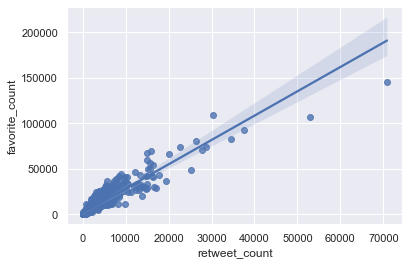

In [145]:
sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
ax = sns.regplot(x=twitter["retweet_count"], y=twitter["favorite_count"], data=tips)

Favorite and retweet counts are highly positively correlated. For about every 4 favorites there is 1 retweet. The majority of the data falls below 40000 favorites and 10000 retweets.

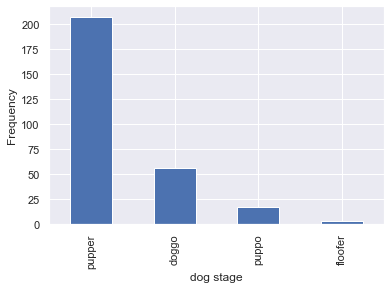

In [156]:
twitter['dog_stage'].value_counts().plot(kind='bar', xlabel='dog stage',ylabel='Frequency');

It can be deduced from the above analysis that the pupper dod stage has the highest frequency  

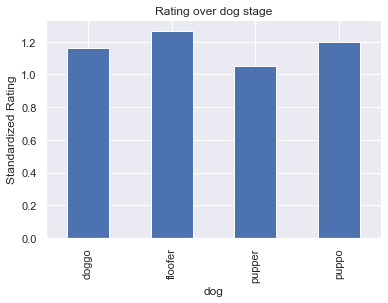

In [153]:
twitter.groupby('dog_stage')['rating'].mean().plot(kind='bar')
plt.title('Rating over dog stage')
plt.xlabel('dog')
plt.ylabel('Standardized Rating')
plt.show;

It can be seen that floofer has the highest rating compared to other dog stage